In [17]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV


In [1]:
import os
os.getcwd()
os.chdir('C:\\Users\\meric\Desktop\codes')

In [2]:
# hem datayı aldık mı diye bakalım, hem içerik ne diye bakalım
import pandas as pd
df=pd.read_csv('Hitters.csv')
# df=df.iloc[:,1:len(df)]
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [4]:
# içinde en az bir eksik veri olan satırları uçuruyoruz:
df=df.dropna()
df

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  \
1      315    81      7    24   38     39     14    3449    835      69   
2      479   130     18    66   72     76      3    1624    457      63   
3      496   141     20    65   78     37     11    5628   1575     225   
4      321    87     10    39   42     30      2     396    101      12   
5      594   169      4    74   51     35     11    4408   1133      19   
..     ...   ...    ...   ...  ...    ...    ...     ...    ...     ...   
317    497   127      7    65   48     37      5    2703    806      32   
318    492   136      5    76   50     94     12    5511   1511      39   
319    475   126      3    61   43     52      6    1700    433       7   
320    573   144      9    85   60     78      8    3198    857      97   
321    631   170      9    77   44     31     11    4908   1457      30   

     CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary  \
1      321   414     375      N        W      632       43      10   475.0   
2      224   266     263      A        W      880       82      14   480.0   
3      828   838     354      N        E      200       11       3   500.0   
4       48    46      33      N        E      805       40       4    91.5   
5      501   336     194      A        W      282      421      25   750.0   
..     ...   ...     ...    ...      ...      ...      ...     ...     ...   
317    379   311     138      N        E      325        9       3   700.0   
318    897   451     875      A        E      313      381      20   875.0   
319    217    93     146      A        W       37      113       7   385.0   
320    470   420     332      A        E     1314      131      12   960.0   
321    775   357     249      A        W      408        4       3  1000.0   

    NewLeague  
1           N  
2           A  
3           N  
4           N  
5           A  
..        ...  
317         N  
318         A  
319         A  
320         A  
321         A  

[263 rows x 20 columns]

In [7]:
dms=pd.get_dummies(df[['League','Division','NewLeague']])
dms

League_A  League_N  Division_E  Division_W  NewLeague_A  NewLeague_N
1           0         1           0           1            0            1
2           1         0           0           1            1            0
3           0         1           1           0            0            1
4           0         1           1           0            0            1
5           1         0           0           1            1            0
..        ...       ...         ...         ...          ...          ...
317         0         1           1           0            0            1
318         1         0           1           0            1            0
319         1         0           0           1            1            0
320         1         0           1           0            1            0
321         1         0           0           1            1            0

[263 rows x 6 columns]

In [9]:
Y=df['Salary']
X_=df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X=pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X

AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
1    315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0    69.0   
2    479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0    63.0   
3    496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   225.0   
4    321.0   87.0   10.0  39.0  42.0   30.0    2.0   396.0   101.0    12.0   
5    594.0  169.0    4.0  74.0  51.0   35.0   11.0  4408.0  1133.0    19.0   
..     ...    ...    ...   ...   ...    ...    ...     ...     ...     ...   
317  497.0  127.0    7.0  65.0  48.0   37.0    5.0  2703.0   806.0    32.0   
318  492.0  136.0    5.0  76.0  50.0   94.0   12.0  5511.0  1511.0    39.0   
319  475.0  126.0    3.0  61.0  43.0   52.0    6.0  1700.0   433.0     7.0   
320  573.0  144.0    9.0  85.0  60.0   78.0    8.0  3198.0   857.0    97.0   
321  631.0  170.0    9.0  77.0  44.0   31.0   11.0  4908.0  1457.0    30.0   

     CRuns   CRBI  CWalks  PutOuts  Assists  Errors  League_N  Division_W  \
1    321.0  414.0   375.0    632.0     43.0    10.0         1           1   
2    224.0  266.0   263.0    880.0     82.0    14.0         0           1   
3    828.0  838.0   354.0    200.0     11.0     3.0         1           0   
4     48.0   46.0    33.0    805.0     40.0     4.0         1           0   
5    501.0  336.0   194.0    282.0    421.0    25.0         0           1   
..     ...    ...     ...      ...      ...     ...       ...         ...   
317  379.0  311.0   138.0    325.0      9.0     3.0         1           0   
318  897.0  451.0   875.0    313.0    381.0    20.0         0           0   
319  217.0   93.0   146.0     37.0    113.0     7.0         0           1   
320  470.0  420.0   332.0   1314.0    131.0    12.0         0           0   
321  775.0  357.0   249.0    408.0      4.0     3.0         0           1   

     NewLeague_N  
1              1  
2              0  
3              1  
4              1  
5              0  
..           ...  
317            1  
318            0  
319            0  
320            0  
321            0  

[263 rows x 19 columns]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


In [19]:
ridge_model=Ridge(alpha=0.1).fit(X_train,Y_train)
ridge_model

Ridge(alpha=0.1)

In [20]:
ridge_model.coef_
# değişik aplha değerleri için farklı coef'ler çıkacak.
#  deneme yanılma yöntemiyle optimum alpha ya karar verilecek

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [21]:
ridge_model.intercept_

-4.578626905723695

In [23]:
# linspace(10,-2,100) 10 ile -2 arasında 100 değer
lambdalar=10**np.linspace(10,-2,100)*0.5
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [26]:
ridge_model=Ridge()
katsayilar=[]

for i in lambdalar:
     ridge_model.set_params(alpha=i)
     ridge_model.fit(X_train,Y_train)
     katsayilar.append(ridge_model.coef_)   
        
katsayilar        

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

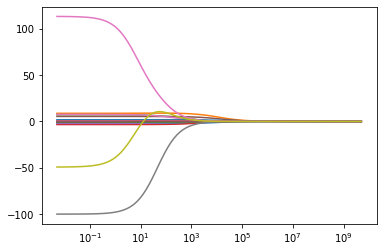

In [27]:
ax=plt.gca()
ax.plot(lambdalar,katsayilar)
# katsayiların hepsini gözlemleyebilmek için rakamları birbirine 
# yakınlaştıralım deyip düzleştirme yapıyoruz
ax.set_xscale("log")
# renkler katsayı değerleri
# x ekseni lambda değerleri

In [30]:
ridge_model=Ridge().fit(X_train,Y_train)
y_pred=ridge_model.predict(X_train)
y_pred[0:10]



array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [31]:
# train hatası
RMSE=np.sqrt(mean_squared_error(Y_train,y_pred))
RMSE

289.3447069600656

In [35]:
from sklearn.model_selection import cross_val_score
np.sqrt(np.mean(-cross_val_score(ridge_model,X_train,Y_train,cv=10,scoring="neg_mean_squared_error")))

351.39315856063814

In [38]:
# test hatası
y_pred=ridge_model.predict(X_test)
RMSE=np.sqrt(mean_squared_error(Y_test,y_pred))
RMSE
# test hatasını modeller arasında seçim yaparken
# train hatasını model oluştururken model parametreleri arasında 
# seçim yaparken kullanıyoruz

356.80829057302236

In [41]:
ridge_model=Ridge(1).fit(X_train,Y_train)
y_pred=ridge_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

356.80829057302236

In [44]:
# 0-100 arası 10 sayı
lambdalar1=np.random.randint(0,1000,100)
lambdalar2=10**np.linspace(10,-2,100)*0.5

In [52]:
# cv: cross_Validation
# ridgecv=RidgeCV(alphas=lambdalar2,scoring='neg_mean_squared_error',cv=10,normalize=True)
ridgecv=RidgeCV(alphas=lambdalar1,scoring='neg_mean_squared_error',cv=10,normalize=True)
ridgecv.fit(X_train,Y_train)
ridgecv.alpha_

20

In [49]:
#final
ridge_tuned=Ridge(alpha=ridgecv.alpha_).fit(X_train,Y_train)


In [50]:
y_pred=ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

356.8583047271503